#Complete EDA of Student Depression
##Data:
#####Student Depression
##Objective:
 The primary aim of this project is to conduct a thorough analysis of the dataset to identify significant insights. Analyzing Mental Health Trends and Predictors Among Students. our main goal will be to find the cause of depression according to this data

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

##Data Loading, Exploration & Wrangling

In [ ]:
df = pd.read_csv('/content/Student Depression Dataset.csv')

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
#View the column names, alternatively we can also use df.columns
print(df.columns.values)

['id' 'Gender' 'Age' 'City' 'Profession' 'Academic Pressure'
 'Work Pressure' 'CGPA' 'Study Satisfaction' 'Job Satisfaction'
 'Sleep Duration' 'Dietary Habits' 'Degree'
 'Have you ever had suicidal thoughts ?' 'Work/Study Hours'
 'Financial Stress' 'Family History of Mental Illness' 'Depression']


In [ ]:
#view the shape of the data, number of rows & columns
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe has 27901 rows and 18 columns


#Descriptive Statistics
##We use descriptive statistics to summarize and understand the key features of dataset.

In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


##Missing values in the data

In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
Financial Stress,3
id,0
Gender,0
Family History of Mental Illness,0
Work/Study Hours,0
Have you ever had suicidal thoughts ?,0
Degree,0
Dietary Habits,0
Sleep Duration,0
Job Satisfaction,0


In [ ]:
# Missing values dealing
#  filling mean value of Price column in the null places of that column
mode_value = df['Financial Stress'].mode()[0]
df['Financial Stress'].fillna(mode_value, inplace=True)

<ipython-input-8-0af7adfc6a85>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(mode_value, inplace=True)


In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
id,0
Gender,0
Family History of Mental Illness,0
Financial Stress,0
Work/Study Hours,0
Have you ever had suicidal thoughts ?,0
Degree,0
Dietary Habits,0
Sleep Duration,0
Job Satisfaction,0


## Relationship between Age and Depression
Let's change the Age to certain ranges for the better understanding of the data

In [ ]:
df.Age.min()

18.0

In [ ]:
df.Age.max()

59.0

In [ ]:
bins = list(range(18, 61, 5))
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
Result_age=df.groupby(['Age_Group', 'Depression']).size().unstack(fill_value=0)
Result_age

<ipython-input-13-855038c7e5df>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Result_age=df.groupby(['Age_Group', 'Depression']).size().unstack(fill_value=0)


Depression,0,1
Age_Group,,
18-22,2505,5765
23-27,3112,5192
28-32,3691,4226
33-37,2237,1143
38-42,9,7
43-47,3,2
48-52,4,1
53-57,2,0


In [ ]:
##from 38 and onward is less importand because the data point is less

###Nomalizing and ploting for visualisation

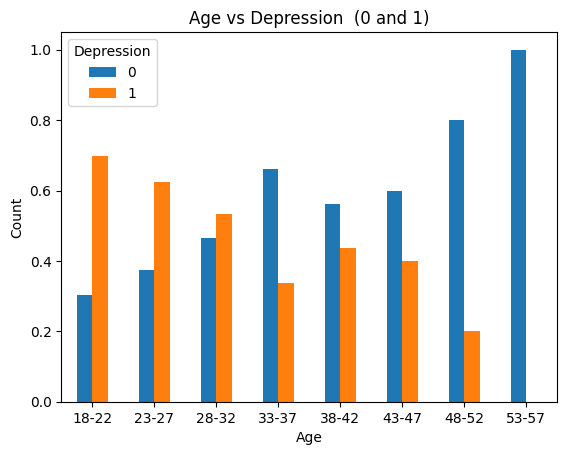

In [ ]:
Nor_Result_age = Result_age.div(Result_age.sum(axis=1), axis=0)

Nor_Result_age.plot(kind='bar', stacked=False)       #Nor_Result_age=Normalize result age
plt.title('Age vs Depression  (0 and 1)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title='Depression', labels=['0', '1'])

In [ ]:
#Figure-1: Shows the relation between age and depression. from the figure the depression is high in the age pf 18-22 and decreasing with age

###Relationship between Gender and Depression

In [ ]:
Result_Gender=df.groupby(['Gender', 'Depression']).size().unstack(fill_value=0)
Result_Gender

Depression,0,1
Gender,,
Female,5133,7221
Male,6432,9115


###Normalizing and Ploting for visualisation

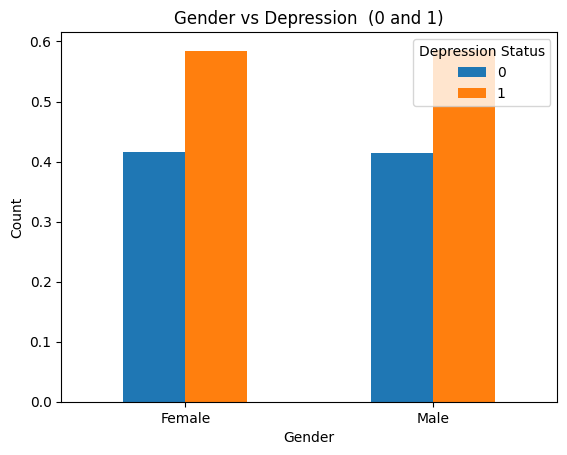

In [ ]:
Nor_Result_Gender = Result_Gender.div(Result_Gender.sum(axis=1), axis=0)
Nor_Result_Gender.plot(kind='bar', stacked=False)
plt.title('Gender vs Depression  (0 and 1)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title='Depression Status', labels=['0', '1'])

In [ ]:
#Figure-2: Shows that the depression almost same in male and female

### Relationship between Sleep Duration and Depression

In [ ]:
Result_sleep_duation=df.groupby(['Sleep Duration', 'Depression']).size().unstack(fill_value=0)
Result_sleep_duation

Depression,0,1
Sleep Duration,,
5-6 hours,2666,3517
7-8 hours,2975,4371
Less than 5 hours,2949,5361
More than 8 hours,2966,3078
Others,9,9


<Figure size 2000x1200 with 0 Axes>

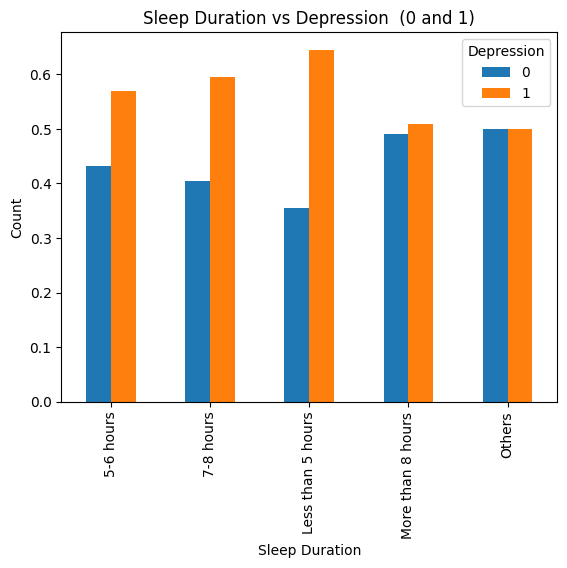

<Figure size 2000x1200 with 0 Axes>

In [ ]:
Nor_Result_Sleep_Duration=Result_sleep_duation.div(Result_sleep_duation.sum(axis=1), axis=0)
Nor_Result_Sleep_Duration.plot(kind='bar', stacked=False)
plt.title('Sleep Duration vs Depression  (0 and 1)')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.xticks(rotation=90)  # To keep the x-axis labels horizontal
plt.legend(title='Depression', labels=['0', '1'])
plt.figure(figsize=(20, 12))

Figure-3: Shows that the depression have a direct relation with sleep time .
from the data suffer most from depression having sleep time less than 5 hour and least having sleep time more than 8.

###Relationship between Dietry Habit and Depression

In [ ]:
Result_Dietary_Habits=df.groupby(['Dietary Habits', 'Depression']).size().unstack(fill_value=0)
Result_Dietary_Habits

Depression,0,1
Dietary Habits,,
Healthy,4178,3473
Moderate,4363,5558
Others,4,8
Unhealthy,3020,7297


###Normalizing and ploting for better visualisation

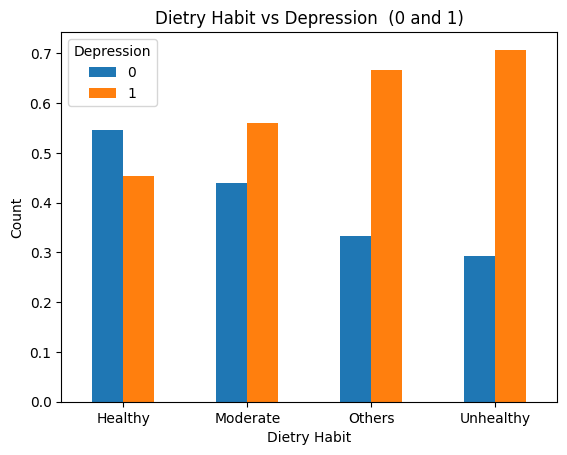

In [ ]:
Nor_Result_Dietary_habits = Result_Dietary_Habits.div(Result_Dietary_Habits.sum(axis=1), axis=0)
Nor_Result_Dietary_habits.plot(kind='bar', stacked=False)
plt.title('Dietry Habit vs Depression  (0 and 1)')
plt.xlabel('Dietry Habit')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title='Depression', labels=['0', '1'])

Figure-3: The figure clearly illustrates a direct relationship between dietary habits and depression. Students with healthy eating habits report the lowest counts of depression, while those with unhealthy diets exhibit the highest counts of depression

### Relationship between Family History and Depression

In [ ]:
Result_family_his = df.groupby(['Family History of Mental Illness', 'Depression']).size().unstack(fill_value=0)
Result_family_his   # family_his =family history

Depression,0,1
Family History of Mental Illness,,
No,6335,8063
Yes,5230,8273


Normalizing and ploting for better visualisation

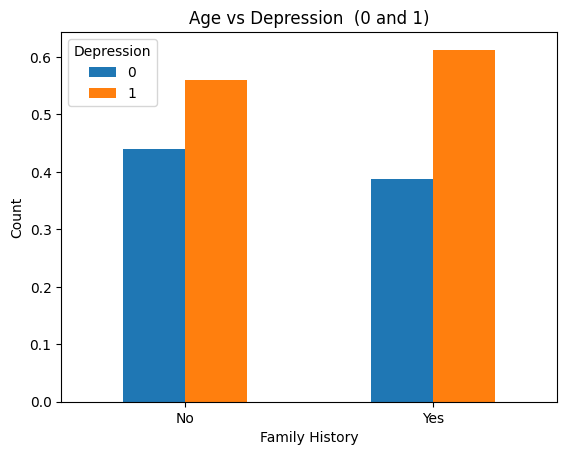

In [ ]:
Nor_Result_family_his=Result_family_his.div(Result_family_his.sum(axis=1), axis=0)
Nor_Result_family_his.plot(kind='bar', stacked=False)
plt.title('Age vs Depression  (0 and 1)')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title='Depression', labels=['0', '1'])

Figure-4: The figure indicates that students with a family history of depression exhibit slightly higher counts of depression

###Relationship between Sucidal thoughts and Depression

In [ ]:
Result_suicidal_thoughts = df.groupby(['Have you ever had suicidal thoughts ?', 'Depression']).size().unstack(fill_value=0)
Result_suicidal_thoughts

Depression,0,1
Have you ever had suicidal thoughts ?,,
No,7866,2379
Yes,3699,13957


Normalizing and ploting for visualisation

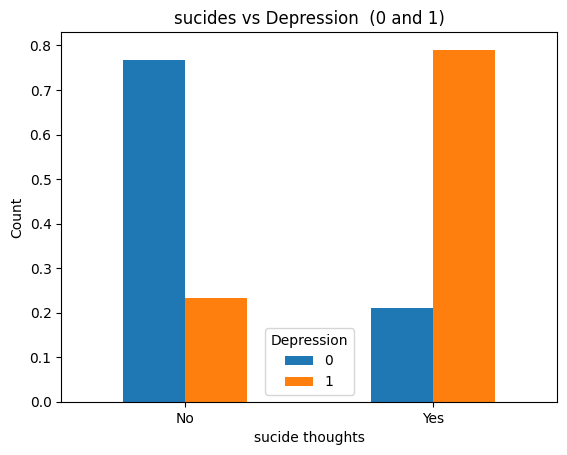

In [ ]:
Result_suicidal_thoughts = df.groupby(['Have you ever had suicidal thoughts ?', 'Depression']).size().unstack(fill_value=0)
Nor_Result_socide_thought=Result_suicidal_thoughts.div(Result_suicidal_thoughts.sum(axis=1), axis=0)
Nor_Result_socide_thought.plot(kind='bar', stacked=False)
plt.title('sucides vs Depression  (0 and 1)')
plt.xlabel('sucide thoughts')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title='Depression', labels=['0', '1'])

 from the figure its very clear that student have sucide thoughs the number of count is high

###Relationship between Acadmic pressure and Depression

In [ ]:
Result_Academic_Pressure = df.groupby(['Academic Pressure', 'Depression']).size().unstack(fill_value=0)
Result_Academic_Pressure

Depression,0,1
Academic Pressure,,
0.0,5,4
1.0,3869,932
2.0,2612,1566
3.0,2973,4489
4.0,1230,3925
5.0,876,5420


Normalizing and ploting for visualisation

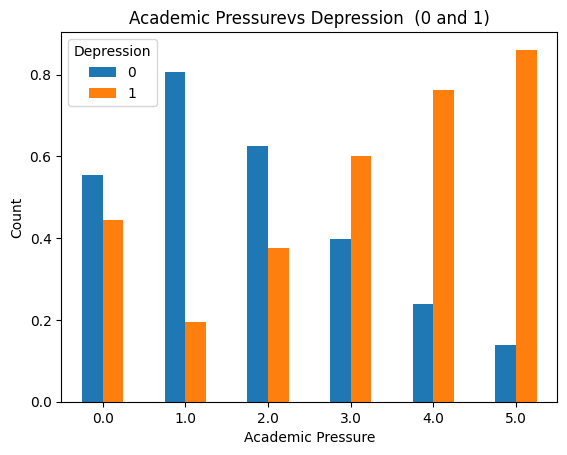

In [ ]:
Result_Academic_Pressure = df.groupby(['Academic Pressure', 'Depression']).size().unstack(fill_value=0)
Nor_Result_Academic_Pressure=Result_Academic_Pressure.div(Result_Academic_Pressure.sum(axis=1), axis=0)
Nor_Result_Academic_Pressure.plot(kind='bar', stacked=False)
plt.title('Academic Pressurevs Depression  (0 and 1)')
plt.xlabel('Academic Pressure')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title='Depression', labels=['0', '1'])

The data clearly indicates that as academic pressure increases, the incidence of depression among students also rises. This finding underscores the significant impact that academic demands can have on students' mental health. 0.0 is not important as we said earlier that number counts is just 9

###Relationship between Financial Stress and Depression

In [ ]:
Result_Financial_Stress = df.groupby(['Financial Stress', 'Depression']).size().unstack(fill_value=0)
Result_Financial_Stress

Depression,0,1
Financial Stress,,
1.0,3489,1632
2.0,2886,2175
3.0,2146,3080
4.0,1785,3990
5.0,1259,5459


Normalizing and ploting for visualisation

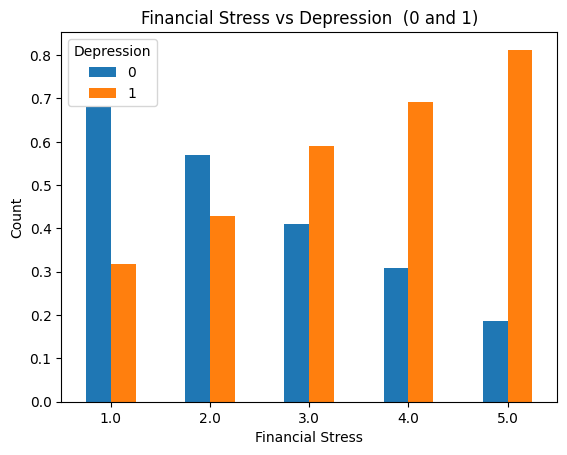

In [ ]:
Result_Financial_Stress = df.groupby(['Financial Stress', 'Depression']).size().unstack(fill_value=0)
Nor_Result_Financial_Stress=Result_Financial_Stress.div(Result_Financial_Stress.sum(axis=1), axis=0)
Nor_Result_Financial_Stress.plot(kind='bar', stacked=False)
plt.title('Financial Stress vs Depression  (0 and 1)')
plt.xlabel('Financial Stress')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title='Depression', labels=['0', '1'])

The data clearly indicates a direct relationship between financial stress and depression. As financial stress levels increase, the incidence of depression among students also rises. This suggests that financial difficulties may significantly impact students' mental health.

### Relationship between Work/Study Hours and Depression

In [ ]:
Result_Work_Study_Hours = df.groupby(['Work/Study Hours', 'Depression']).size().unstack(fill_value=0)
Result_Work_Study_Hours

Depression,0,1
Work/Study Hours,,
0.0,1096,604
1.0,686,464
2.0,894,696
3.0,773,697
4.0,799,815
5.0,590,706
6.0,959,1288
7.0,825,1176
8.0,941,1568


Normalizing and ploting for visualisation

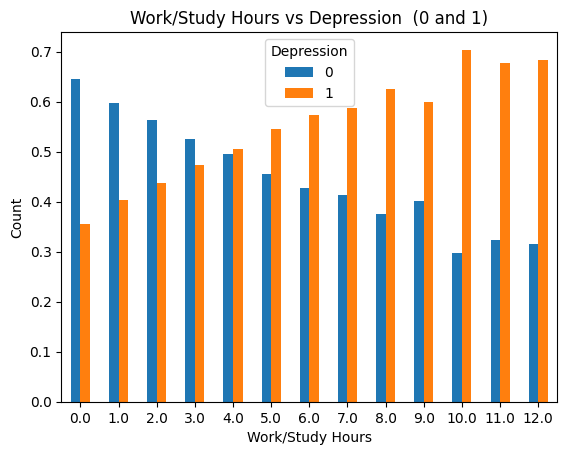

In [ ]:
Result_Work_Study_Hours = df.groupby(['Work/Study Hours', 'Depression']).size().unstack(fill_value=0)
Nor_Result_Work_Study_Hours=Result_Work_Study_Hours.div(Result_Work_Study_Hours.sum(axis=1), axis=0)
Nor_Result_Work_Study_Hours.plot(kind='bar', stacked=False)
plt.title('Work/Study Hours vs Depression  (0 and 1)')
plt.xlabel('Work/Study Hours')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal
plt.legend(title='Depression', labels=['0', '1'])

From the data, it is evident that there is a direct correlation between work/study hours and depression. As the number of work/study hours increases, the incidence of depression among students also rises. This suggests that prolonged academic and work commitments may significantly contribute to mental health challenges.

##Conclusion

Age and Depression: Students aged 18 to 22 exhibit a high prevalence of depression.

Gender Differences: The depression rates among male and female students are nearly equal, indicating that both genders are similarly affected.

Sleeping Patterns: Students who sleep less than 5 hours experience higher levels of depression, whereas those who sleep more than 8 hours tend to have the lowest depression rates.

Dietary Habits: There is a significant relationship between dietary habits and depression. Students with healthy eating habits report lower levels of depression, while those with unhealthy diets show higher levels of depression.

Family History: Students with a family history of depression have a slightly higher incidence of depression compared to those without such a history Suicidal Thoughts: A significant number of students report experiencing suicidal thoughts, indicating a serious concern regarding mental health among this population.

Academic Pressure: As academic pressure on students increases, the incidence of depression also rises, highlighting the impact of stress from educational demands.

Financial Stress: Increasing financial stress correlates with a higher incidence of depression among students, suggesting that financial concerns significantly affect mental well-being.

Work/Study Hours: As students' study and work hours increase, there is a corresponding rise in depression rates, indicating that excessive workload may contribute to mental health challenges